   age  blood_pressure  glucose gender  num_conditions  days_in_hospital  \
0   65             130      160      M               3                 5   
1   45             120       90      F               1                 2   
2   70             145      180      M               4                 7   
3   65             130      175      M               3                 8   
4   75             120      180      M               5                10   

   readmitted  
0           1  
1           0  
2           1  
3           1  
4           1  
             age  blood_pressure     glucose  num_conditions  \
count  11.000000       11.000000   11.000000       11.000000   
mean   57.181818      210.545455  133.545455        2.909091   
std    15.091840      299.285938   40.294823        1.445998   
min    35.000000       90.000000   70.000000        1.000000   
25%    45.000000      117.500000   98.500000        2.000000   
50%    65.000000      120.000000  150.000000        3.000000   

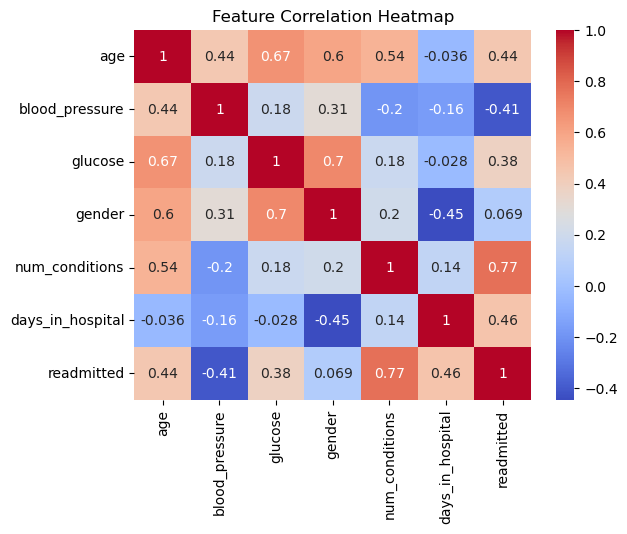

✅ Preprocessing complete and saved.


In [15]:
# eda_preprocessing.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel("C:\\Users\\ochie\\OneDrive\\Documents\\data_sample_readmission_data.csv.xlsx")

# EDA: quick overview
print(df.head())
print(df.describe())
print(df.isnull().sum())

# Encode gender
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Feature correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Normalize numeric features
features_to_scale = ['age', 'blood_pressure', 'glucose', 'days_in_hospital']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Save processed dataset
df.to_csv('C:\\Users\\ochie\\OneDrive\\Documents\\data\\processed_data.csv', index=False)
print("✅ Preprocessing complete and saved.")


In [8]:
print(df.columns)


Index(['age,blood_pressure,glucose,gender,num_conditions,days_in_hospital,readmitted'], dtype='object')


In [14]:
import os
os.makedirs(r"C:\Users\ochie\OneDrive\Documents\data", exist_ok=True)

In [16]:
# model_training.ipynb

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load processed data
df = pd.read_csv('../data/processed_data.csv')

# Define X and y
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, '../models/readmission_model.pkl')
print("✅ Model trained and saved.")


ModuleNotFoundError: No module named 'xgboost'

In [17]:
import xgboost
print(xgboost.__version__)

ModuleNotFoundError: No module named 'xgboost'

In [18]:
pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import xgboost
print(xgboost.__version__)

3.0.2


In [21]:
# model_training.ipynb

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load processed data
df = pd.read_excel("C:\\Users\\ochie\\OneDrive\\Documents\\data_sample_readmission_data.csv.xlsx")

# Define X and y
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, '../models/readmission_model.pkl')
print("✅ Model trained and saved.")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object

In [22]:
print(X_train.dtypes)
print(X_train['gender'].head())

age                  int64
blood_pressure       int64
glucose              int64
gender              object
num_conditions       int64
days_in_hospital     int64
dtype: object
2    M
1    F
8    M
4    M
7    F
Name: gender, dtype: object


In [23]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load processed data
try:
    df = pd.read_excel(r"C:\Users\ochie\OneDrive\Documents\data_sample_readmission_data.csv.xlsx", engine='openpyxl')
    print("✅ Data loaded successfully.")
    print("Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    print("Dtypes:\n", df.dtypes)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Encode gender column
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'M': 1, 'F': 0}).astype(int)
    print("✅ Gender encoded as numerical values (M=1, F=0).")
else:
    print("Error: 'gender' column not found. Available columns:", df.columns.tolist())
    raise KeyError("Gender column missing")

# Scale numerical features (optional, but recommended for XGBoost)
scaler = StandardScaler()
numerical_features = ['age', 'blood_pressure', 'glucose', 'num_conditions', 'days_in_hospital']
if all(col in df.columns for col in numerical_features):
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    print("✅ Numerical features scaled.")
else:
    print("Error: Some numerical features missing. Available columns:", df.columns.tolist())
    raise KeyError("Missing numerical features")

# Define X and y
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Verify dtypes
print("X dtypes:\n", X.dtypes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("✅ Data split into training and test sets.")

# Train model
model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100)
try:
    model.fit(X_train, y_train)
    print("✅ Model trained successfully.")
except Exception as e:
    print(f"Error training model: {e}")
    raise

# Evaluate
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model
output_dir = r"C:\Users\ochie\OneDrive\Documents\models"
output_file = os.path.join(output_dir, "readmission_model.pkl")
try:
    os.makedirs(output_dir, exist_ok=True)
    joblib.dump(model, output_file)
    print(f"✅ Model trained and saved to {output_file}")
except Exception as e:
    print(f"Error saving model: {e}")
    # Fallback: save in current directory
    joblib.dump(model, "readmission_model.pkl")
    print("✅ Model saved to current directory as 'readmission_model.pkl'")

✅ Data loaded successfully.
Columns: ['age', 'blood_pressure', 'glucose', 'gender', 'num_conditions', 'days_in_hospital', 'readmitted']
First few rows:
    age  blood_pressure  glucose gender  num_conditions  days_in_hospital  \
0   65             130      160      M               3                 5   
1   45             120       90      F               1                 2   
2   70             145      180      M               4                 7   
3   65             130      175      M               3                 8   
4   75             120      180      M               5                10   

   readmitted  
0           1  
1           0  
2           1  
3           1  
4           1  
Dtypes:
 age                  int64
blood_pressure       int64
glucose              int64
gender              object
num_conditions       int64
days_in_hospital     int64
readmitted           int64
dtype: object
✅ Gender encoded as numerical values (M=1, F=0).
✅ Numerical features scaled.
X dt

C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
print("Total samples:", len(df))
print("Target class distribution:\n", df['readmitted'].value_counts(normalize=True))

Total samples: 11
Target class distribution:
 readmitted
1    0.636364
0    0.363636
Name: proportion, dtype: float64


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validation F1 scores: [0.4        1.         0.33333333 0.33333333 0.33333333]
Mean F1 score: 0.48


C:\Users\ochie\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [27]:
scores = cross_val_score(model, X, y, cv=3, scoring='f1_macro')
print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validation F1 scores: [0.42857143 0.33333333 0.4       ]
Mean F1 score: 0.38730158730158726


In [28]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo, scoring='f1_macro')
print("LOOCV F1 scores:", scores)
print("Mean F1 score:", scores.mean())

LOOCV F1 scores: [1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
Mean F1 score: 0.5454545454545454


In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE, class distribution:\n", pd.Series(y_train).value_counts())

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)

In [31]:
# Remove cross_val_score and proceed with train-test split
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
 [[0 1]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [32]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from imblearn.over_sampling import SMOTE

# Load data
try:
    df = pd.read_excel(r"C:\Users\ochie\OneDrive\Documents\data_sample_readmission_data.csv.xlsx", engine='openpyxl')
    print("✅ Data loaded successfully.")
    print("Total samples:", len(df))
    print("Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    print("Dtypes:\n", df.dtypes)
    print("Target class distribution:\n", df['readmitted'].value_counts(normalize=True))
    print("Target counts:\n", df['readmitted'].value_counts())
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Encode gender
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'M': 1, 'F': 0}).astype(int)
    print("✅ Gender encoded as numerical values (M=1, F=0).")
else:
    print("Error: 'gender' column not found. Available columns:", df.columns.tolist())
    raise KeyError("Gender column missing")

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'blood_pressure', 'glucose', 'num_conditions', 'days_in_hospital']
if all(col in df.columns for col in numerical_features):
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    print("✅ Numerical features scaled.")
else:
    print("Error: Some numerical features missing. Available columns:", df.columns.tolist())
    raise KeyError("Missing numerical features")

# Define X and y
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Verify dtypes
print("X dtypes:\n", X.dtypes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and test sets.")
print("Test set size:", len(X_test))
print("Train class distribution:\n", pd.Series(y_train).value_counts())

# Apply SMOTE
try:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("After SMOTE, class distribution:\n", pd.Series(y_train).value_counts())
except ValueError as e:
    print(f"SMOTE failed: {e}. Likely due to insufficient samples.")
    # Proceed without SMOTE if it fails

# Calculate class weight
neg, pos = df['readmitted'].value_counts()
scale_pos_weight = neg / pos if pos > 0 else 1
print(f"Scale pos weight: {scale_pos_weight}")

# Train model
model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, scale_pos_weight=scale_pos_weight)
try:
    model.fit(X_train, y_train)
    print("✅ Model trained successfully.")
except Exception as e:
    print(f"Error training model: {e}")
    raise

# Cross-validation with reduced folds
try:
    scores = cross_val_score(model, X, y, cv=3, scoring='f1_macro')
    print("Cross-validation F1 scores:", scores)
    print("Mean F1 score:", scores.mean())
except ValueError as e:
    print(f"Cross-validation failed: {e}. Likely due to small dataset.")

# Evaluate
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Feature importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print("Feature Importances:\n", importances.sort_values(by='Importance', ascending=False))

# Save model
output_dir = r"C:\Users\ochie\OneDrive\Documents\models"
output_file = os.path.join(output_dir, "readmission_model.pkl")
try:
    os.makedirs(output_dir, exist_ok=True)
    joblib.dump(model, output_file)
    print(f"✅ Model trained and saved to {output_file}")
except Exception as e:
    print(f"Error saving model: {e}")
    joblib.dump(model, "readmission_model.pkl")
    print("✅ Model saved to current directory as 'readmission_model.pkl'")

Error loading data: [Errno 13] Permission denied: 'C:\\Users\\ochie\\OneDrive\\Documents\\data_sample_readmission_data.csv.xlsx'


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\ochie\\OneDrive\\Documents\\data_sample_readmission_data.csv.xlsx'

In [34]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from imblearn.over_sampling import SMOTE

# Test file access
file_path = r"C:\Users\ochie\OneDrive\Documents\data_sample_readmission_data.csv.xlsx"
print("File exists:", os.path.exists(file_path))
print("File readable:", os.access(file_path, os.R_OK))

# Load data
try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print("✅ Data loaded successfully.")
    print("Total samples:", len(df))
    print("Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    print("Dtypes:\n", df.dtypes)
    print("Target class distribution:\n", df['readmitted'].value_counts(normalize=True))
    print("Target counts:\n", df['readmitted'].value_counts())
except PermissionError as e:
    print(f"PermissionError: {e}. Try closing applications using the file or running as administrator.")
    raise
except Exception as e:
    print(f"Error loading data: {e}. Trying as CSV...")
    try:
        df = pd.read_csv(file_path, sep=',')
        print("✅ Data loaded as CSV.")
        print("Total samples:", len(df))
        print("Columns:", df.columns.tolist())
        print("First few rows:\n", df.head())
        print("Dtypes:\n", df.dtypes)
    except Exception as e:
        print(f"CSV loading failed: {e}")
        raise

# Encode gender
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'M': 1, 'F': 0}).astype(int)
    print("✅ Gender encoded as numerical values (M=1, F=0).")
else:
    print("Error: 'gender' column not found. Available columns:", df.columns.tolist())
    raise KeyError("Gender column missing")

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'blood_pressure', 'glucose', 'num_conditions', 'days_in_hospital']
if all(col in df.columns for col in numerical_features):
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    print("✅ Numerical features scaled.")
else:
    print("Error: Some numerical features missing. Available columns:", df.columns.tolist())
    raise KeyError("Missing numerical features")

# Define X and y
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Verify dtypes
print("X dtypes:\n", X.dtypes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and test sets.")
print("Test set size:", len(X_test))
print("Train class distribution:\n", pd.Series(y_train).value_counts())

# Apply SMOTE
try:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("After SMOTE, class distribution:\n", pd.Series(y_train).value_counts())
except ValueError as e:
    print(f"SMOTE failed: {e}. Likely due to insufficient samples.")
    # Proceed without SMOTE if it fails

# Calculate class weight
neg, pos = df['readmitted'].value_counts()
scale_pos_weight = neg / pos if pos > 0 else 1
print(f"Scale pos weight: {scale_pos_weight}")

# Train model
model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, scale_pos_weight=scale_pos_weight)
try:
    model.fit(X_train, y_train)
    print("✅ Model trained successfully.")
except Exception as e:
    print(f"Error training model: {e}")
    raise

# Cross-validation with reduced folds
try:
    scores = cross_val_score(model, X, y, cv=3, scoring='f1_macro')
    print("Cross-validation F1 scores:", scores)
    print("Mean F1 score:", scores.mean())
except ValueError as e:
    print(f"Cross-validation failed: {e}. Likely due to small dataset.")

# Evaluate
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Feature importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print("Feature Importances:\n", importances.sort_values(by='Importance', ascending=False))

# Save model
output_dir = r"C:\Users\ochie\OneDrive\Documents\models"
output_file = os.path.join(output_dir, "readmission_model.pkl")
try:
    os.makedirs(output_dir, exist_ok=True)
    joblib.dump(model, output_file)
    print(f"✅ Model trained and saved to {output_file}")
except Exception as e:
    print(f"Error saving model: {e}")
    joblib.dump(model, "readmission_model.pkl")
    print("✅ Model saved to current directory as 'readmission_model.pkl'")

File exists: True
File readable: True
✅ Data loaded successfully.
Total samples: 11
Columns: ['age', 'blood_pressure', 'glucose', 'gender', 'num_conditions', 'days_in_hospital', 'readmitted']
First few rows:
    age  blood_pressure  glucose gender  num_conditions  days_in_hospital  \
0   65             130      160      M               3                 5   
1   45             120       90      F               1                 2   
2   70             145      180      M               4                 7   
3   65             130      175      M               3                 8   
4   75             120      180      M               5                10   

   readmitted  
0           1  
1           0  
2           1  
3           1  
4           1  
Dtypes:
 age                  int64
blood_pressure       int64
glucose              int64
gender              object
num_conditions       int64
days_in_hospital     int64
readmitted           int64
dtype: object
Target class distribution: